# Assignment 7.1 

##### Objective: Reproduce the first example of the lesson 7.3 lecture from ECE517 Machine Learning

#### Importing packages

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel


#### Generating Training and Test Samples

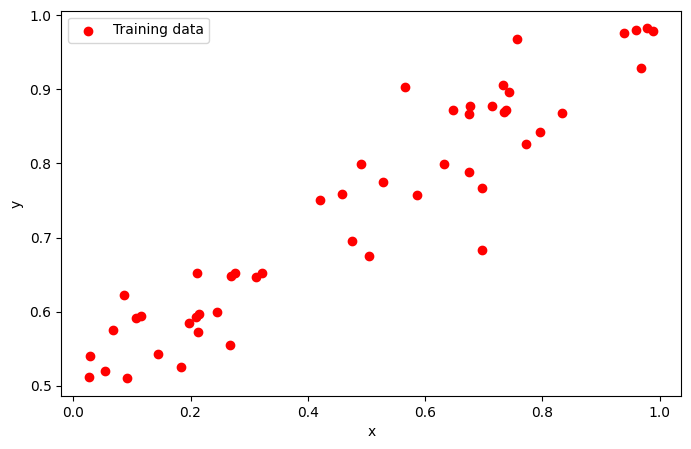

In [191]:
# Function to generate samples from the linear model
def generate_samples(num_samples, sigma):
    X = np.random.rand(num_samples, 1)
    y = 0.5 * X + 0.5 + np.random.normal(0, sigma, size=(num_samples, 1))
    # Yn = 0.5Xn + 0.5 + Wn
    # S.T. Wn is an iid Gaussian noise with zero mean and variance sigma^2
    return X, y

sigma = 0.05
N_train_samples = 50
N_test_samples = 10
# Generate training data
X_train, y_train = generate_samples(N_train_samples, sigma=sigma)

# Generate test data
X_test = np.linspace(0, 1, N_test_samples).reshape(-1, 1)

#plot the training data and test data
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, c='red', label='Training data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Training the GP and predicting on test data

In [192]:
# Define the Gaussian Process model with a DotProduct kernel and white noise
# kernel = DotProduct(sigma_0=0.5)
# kernel = DotProduct() + WhiteKernel(noise_level=0.1) + ConstantKernel(constant_value=1.0)
kernel = DotProduct() + ConstantKernel() + WhiteKernel()
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10) 
# alpha is the variance of the white noise (sigma^2) intially set to 0.9

# Fit the Gaussian Process model to the training data
gp_model.fit(X_train, y_train)

# Make predictions on the test data
# y_pred, cov_matrix = gp_model.predict(X_test, return_cov=True)
# sigma_pred = np.sqrt(np.diag(cov_matrix))
y_pred, sigma_pred = gp_model.predict(X_test, return_std=True)

gp_model.kernel_

DotProduct(sigma_0=0.00181) + 0.507**2 + WhiteKernel(noise_level=0.0025)

In [193]:
gp_model.get_params()

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel__k1': DotProduct(sigma_0=1) + 1**2,
 'kernel__k2': WhiteKernel(noise_level=1),
 'kernel__k1__k1': DotProduct(sigma_0=1),
 'kernel__k1__k2': 1**2,
 'kernel__k1__k1__sigma_0': 1.0,
 'kernel__k1__k1__sigma_0_bounds': (1e-05, 100000.0),
 'kernel__k1__k2__constant_value': 1.0,
 'kernel__k1__k2__constant_value_bounds': (1e-05, 100000.0),
 'kernel__k2__noise_level': 1.0,
 'kernel__k2__noise_level_bounds': (1e-05, 100000.0),
 'kernel': DotProduct(sigma_0=1) + 1**2 + WhiteKernel(noise_level=1),
 'n_restarts_optimizer': 10,
 'n_targets': None,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None}

#### Plot the results

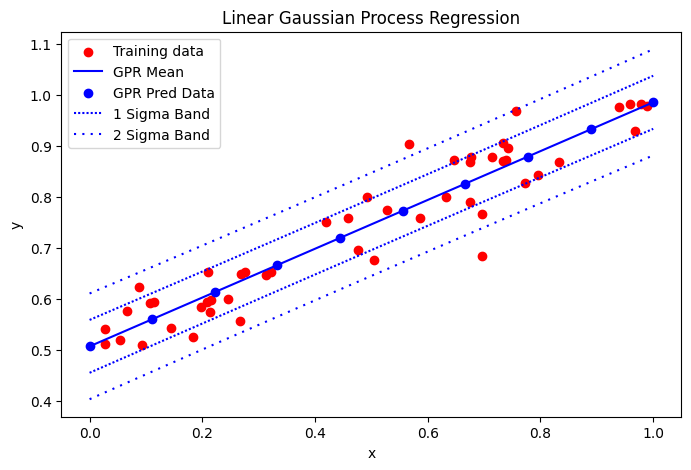

In [194]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.plot(X_test, y_pred, color='blue', label='GPR Mean')
plt.scatter(X_test, y_pred, color='blue', label='GPR Pred Data')
plt.plot(X_test, y_pred - 1 * sigma_pred, linestyle=(0,(1,1)), color='blue', label='1 Sigma Band')
plt.plot(X_test, y_pred + 1 * sigma_pred, linestyle=(0,(1,1)), color='blue')
plt.plot(X_test, y_pred - 2 * sigma_pred, linestyle=(0,(1,3)), color='blue', label='2 Sigma Band')
plt.plot(X_test, y_pred + 2 * sigma_pred, linestyle=(0,(1,3)), color='blue')
plt.title('Linear Gaussian Process Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Counting the training samples in sigma bands

In [195]:
# Counting the number of training samples in the 1 sigma band and 2 sigma band

# 1 sigma band and 2 sigma band intercept
Lower_Sigma1_Slope_Int = y_pred[0] - 1 * sigma_pred[0]
Upper_Sigma1_Slope_Int = y_pred[0] + 1 * sigma_pred[0]
Lower_Sigma2_Slope_Int = y_pred[0] - 2 * sigma_pred[0]
Upper_Sigma2_Slope_Int = y_pred[0] + 2 * sigma_pred[0]

# 1 sigma band and 2 sigma band slope
Lower_Sigma1_Slope = ((y_pred[0] - 1 * sigma_pred[0])
                       - (y_pred[9] - 1 * sigma_pred[9]))/(X_test[0] - X_test[9])
Upper_Sigma1_Slope = ((y_pred[0] + 1 * sigma_pred[0])
                       - (y_pred[9] + 1 * sigma_pred[9]))/(X_test[0] - X_test[9])
Lower_Sigma2_Slope = ((y_pred[0] - 2 * sigma_pred[0])
                       - (y_pred[9] - 2 * sigma_pred[9]))/(X_test[0] - X_test[9])
Upper_Sigma2_Slope = ((y_pred[0] + 2 * sigma_pred[0])
                       - (y_pred[9] + 2 * sigma_pred[9]))/(X_test[0] - X_test[9])

# Counts of training samples in the 1 sigma band and 2 sigma band
Count_Sigma1 = 0
Count_Sigma2 = 0
Count_Outside = 0

for i in range(0, N_train_samples):
    # 1 sigma band and 2 sigma band lines
    UpperSlope2 = Upper_Sigma2_Slope_Int + Upper_Sigma2_Slope * X_train[i] 
    UpperSlope1 = Upper_Sigma1_Slope_Int + Upper_Sigma1_Slope * X_train[i] 
    LowerSlope1 = Lower_Sigma1_Slope_Int + Lower_Sigma1_Slope * X_train[i] 
    LowerSlope2 = Lower_Sigma2_Slope_Int + Lower_Sigma2_Slope * X_train[i] 
    # Counting the number of training samples in the 1 sigma band
    if (y_train[i] <= UpperSlope1) and (y_train[i] >= LowerSlope1): 
        Count_Sigma1 = Count_Sigma1 + 1
    # Outside the 1 sigma band and inside the 2 sigma band
    elif (y_train[i] > UpperSlope1) and (y_train[i] <= UpperSlope2): 
        Count_Sigma2 = Count_Sigma2 + 1
    elif (y_train[i] < LowerSlope1) and (y_train[i] >= LowerSlope2): 
        Count_Sigma2 = Count_Sigma2 + 1
    # Outside the 2 sigma band
    else: Count_Outside = Count_Outside + 1

print("Number of Training Samples in the Sigma 1 Band: ", Count_Sigma1)
print("Number of Training Samples in the Sigma 2 Band: ", Count_Sigma2)
print("Number of Training Samples Outside the Sigma 2 Band: ", Count_Outside)

if Count_Sigma1 + Count_Sigma2 + Count_Outside != N_train_samples:
    print("\n*****************\nThe training sample summation does not add up.")

Number of Training Samples in the Sigma 1 Band:  40
Number of Training Samples in the Sigma 2 Band:  8
Number of Training Samples Outside the Sigma 2 Band:  2
